In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
import os

In [3]:
# 1. Load the Processed Data
print("Loading processed data...")
# The corrected path WITHOUT the leading slash
input_path = '/Users/om/Conclave/Phishing_Detection_model/processed/email_features.csv'
df = pd.read_csv(input_path)

Loading processed data...


In [4]:
# 2. Prepare Data for Modeling
X = df.drop('is_phishing', axis=1)
y = df['is_phishing']

In [5]:
# 3. Split Data into Training and Testing Sets
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Splitting data...


In [7]:
# 4. Initialize and Train the XGBoost Model
print("\nTraining the XGBoost model...")
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")


Training the XGBoost model...
Model training complete.


In [8]:
# 5. Evaluate the Model's Performance
print("\nEvaluating model performance...")
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, preds, target_names=['Safe', 'Phishing']))


Evaluating model performance...
Accuracy: 89.52%

Classification Report:
              precision    recall  f1-score   support

        Safe       0.91      0.98      0.94       638
    Phishing       0.80      0.48      0.60       125

    accuracy                           0.90       763
   macro avg       0.85      0.73      0.77       763
weighted avg       0.89      0.90      0.88       763



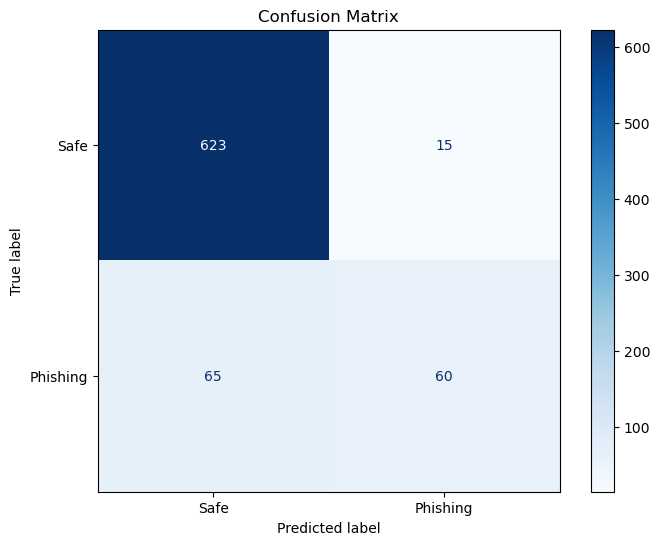

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', ax=ax, display_labels=['Safe', 'Phishing'])
plt.title('Confusion Matrix')
plt.show()

In [10]:
# 6. Save the Trained Model
print("\nSaving the trained model...")
output_folder = 'Phishing_Detection_model/models'
os.makedirs(output_folder, exist_ok=True)
model_path = os.path.join(output_folder, 'phishing_detector_v1.joblib')
joblib.dump(model, model_path)
print(f"Model successfully saved to: {model_path}")


Saving the trained model...
Model successfully saved to: Phishing_Detection_model/models/phishing_detector_v1.joblib
